### Aleksandr Belov

# Home Assignment No. 3: Part 1 (Theory and Practice)
To solve this task, you will write a lot of code to try several machine learning methods for dimensionality reduction and anomaly detection.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

In [1]:
RANDOM_STATE = 42

## Task 1. Practice with Different Anomaly Detection Algorithms. (5 points)
### Task 1.1. (1 point)
Explore two One-Class SVM methods, write down corresponding minimization functions (try to keep equal notations) and explain the differences (1-2 sentences).
1. Scholkopf et al.: http://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf
2. Tax et al.:  https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf

#### Your solution:

### 1. Schölkopf
$$ \frac{1}{2}\|w\|^2 - \rho + \frac{1}{\nu N} \sum_{i} \xi_i \longrightarrow \min_{w, \rho, \xi}$$
with $$w\cdot x_i \geq \rho - \xi_i$$

$$ \xi_i \geq 0$$

### 2. SVDD
#### 2.1. Normal data description
$$R^2 + C \sum_i \xi_i \longrightarrow \min_{R, a, \xi_i}$$
with $$\|x_i - a\|^2 \leq R^2 + \xi_i$$

$$\xi_i \geq 0$$

That is the same as Schölkopf minimizes the structural error of the hyperplane:

$$ \frac{1}{2}\|w\|^2 - \rho + \frac{1}{\nu N} \sum_{i} \xi_i \longrightarrow \min_{w, \rho, \xi}$$
with $$w\cdot x_i \geq \rho - \xi_i$$

$$ \xi_i \geq 0$$

#### 2.2. With negative examples

$$R^2 + C_1\sum_i \xi_i + C_2 \sum_l \xi_l \longrightarrow \min_{R, a, \xi_i, \xi_l}$$
with $$\|x_i - a\|^2 \leq R^2 + \xi_i$$

$$\|x_l - a\|^2 \geq R^2 + \xi_l$$

$$\xi_i \geq 0, \xi_l \geq 0$$



In the 1st paper was proposed a method which estimate a function $f$ that is positive on target data and negative on outliers.

In the 2nd paper was proposed a method which obtains a spherically shaped boundary around the target points. 

All of those methods albe to use Kernel Trick for mapping features that improve the quality of outliers separation quality. Also the 1st paper and 2nd paper part of Normal data description have the same minimization function.

The 2nd paper able to use negative examples for training to improve the description.

### Task 1.2. (2 points)

1. **(1 pt.)** For the `frod_detection` dataset,  predict the anomaly with any three sklearn built-in Anomaly detection methods: https://scikit-learn.org/stable/modules/outlier_detection.html

**Note:** do not forget to relabel predictions from Anomaly detection methods, as they could be negative.

2. **(1 pt.)** Estimate the __contamination__ (or impurity) on the training set as the ratio of anomaly objects in the whole sample. Explore, how the `roc_auc_score` changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

y = y.apply(lambda x: 1 if x == 0 else -1).values

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=RANDOM_STATE)
train_X, test_X, train_y, test_y = tt_split 

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)


c = len(train_y[train_y==-1]) / len(train_y)
print(f'Train contamination: {c:.5f}' )

# delete the targets for training
train_y = 0

Train contamination: 0.01702


In [3]:
# impurity estimation on test data
contamination = len(test_y[test_y == -1]) / len(test_y) # >>> your solution here <<<
print(f'Test contamination: {contamination:.5f}' )

Test contamination: 0.01694


In [4]:
from sklearn.ensemble import IsolationForest# >>> your solution here <<<
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

In [5]:
%%time

get_ad_models = [lambda c: IsolationForest(n_estimators=200, contamination=c, bootstrap=True,
                                           n_jobs=-1, random_state=RANDOM_STATE),
                 lambda c: EllipticEnvelope(contamination=c, support_fraction=0.95, 
                                            random_state=RANDOM_STATE, assume_centered=True),
                 lambda c: LocalOutlierFactor(novelty=True, contamination=c, n_jobs=-1)
                ]

model_names = ['IsolationForest', 'EllipticEnvelope', 'LocalOutlierFactor']
contamination_coefs = [0.1, 0.5, 1, 5, 10]

for name, get_model in zip(model_names, get_ad_models):
    print(f'\n{name}:')
    for i in contamination_coefs:
        # >>> your solution here <<<
        model = get_model(contamination*i)

        model.fit(train_X)
        y_pred = model.predict(test_X)

        roc_auc = roc_auc_score(test_y, y_pred)
        precision = precision_score(test_y, y_pred, average="micro")
        print(f'\ti: {i}',
              f'\tContamination: {contamination * i:.4f}',
              f'\tROC/AUC: {roc_auc:.4f}', 
              f'\tPrecision: {precision:.4f}')


IsolationForest:
	i: 0.1 	Contamination: 0.0017 	ROC/AUC: 0.5816 	Precision: 0.9858
	i: 0.5 	Contamination: 0.0085 	ROC/AUC: 0.7029 	Precision: 0.9876
	i: 1 	Contamination: 0.0169 	ROC/AUC: 0.7827 	Precision: 0.9869
	i: 5 	Contamination: 0.0847 	ROC/AUC: 0.9034 	Precision: 0.9284
	i: 10 	Contamination: 0.1694 	ROC/AUC: 0.8704 	Precision: 0.8438

EllipticEnvelope:
	i: 0.1 	Contamination: 0.0017 	ROC/AUC: 0.5405 	Precision: 0.9838
	i: 0.5 	Contamination: 0.0085 	ROC/AUC: 0.6824 	Precision: 0.9869
	i: 1 	Contamination: 0.0169 	ROC/AUC: 0.8853 	Precision: 0.9914
	i: 5 	Contamination: 0.0847 	ROC/AUC: 0.9019 	Precision: 0.9253
	i: 10 	Contamination: 0.1694 	ROC/AUC: 0.8711 	Precision: 0.8451

LocalOutlierFactor:
	i: 0.1 	Contamination: 0.0017 	ROC/AUC: 0.5099 	Precision: 0.9827
	i: 0.5 	Contamination: 0.0085 	ROC/AUC: 0.5076 	Precision: 0.9782
	i: 1 	Contamination: 0.0169 	ROC/AUC: 0.5120 	Precision: 0.9672
	i: 5 	Contamination: 0.0847 	ROC/AUC: 0.5220 	Precision: 0.9081
	i: 10 	Contaminat

- For the fraud detection problem is important to get high Precision with low False Positive rate.
- The `IsolationForest` got the best ROC/AUC score with `i=5`. 
- Therefore the `IsolationForest` is my favorite method, also I will use  the `contamination ~= 0.017 * 5 ~= 0.085`.

In [6]:
favorite_model = lambda c: IsolationForest(n_estimators=200, contamination=c, bootstrap=True,
                                           n_jobs=-1, random_state=RANDOM_STATE)
my_contamination = contamination * 5
my_contamination

0.08468717594192879

### Task 1.3. (2 points)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.

As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. **(1 pt.)** Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 
2. **(1 pt.)**  Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [7]:
# your favorite classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []

get_my_favorite_clf = lambda : LogisticRegression(C=1, random_state=RANDOM_STATE, n_jobs=-1)

for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    clf = get_my_favorite_clf()
    clf.fit(test_X[train_index], test_y[train_index])

    y_pred = clf.predict(test_X[test_index])

    roc_auc_scores.append(roc_auc_score(test_y[test_index], y_pred))
    pr_scores.append(precision_score(test_y[test_index], y_pred))

print(f'ROC/AUC mean: {np.mean(roc_auc_scores):.4f} std: {np.std(roc_auc_scores):.4f}')
print(f'Precision mean: {np.mean(pr_scores):.4f} std: {np.std(pr_scores):.4f}') 

ROC/AUC mean: 0.9398 std: 0.0664
Precision mean: 0.9979 std: 0.0023


In [8]:
%%time
# ensemble of classifiers

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_scores = []

for train_index, test_index in skf.split(test_X, test_y):

    # >>> your solution here <<<
    models = [ad_model(my_contamination) for ad_model in get_ad_models]
    models = [m.fit(np.vstack((train_X, test_X[train_index]))) for m in models]

    test_preds = np.hstack([m.predict(test_X[test_index]).reshape(-1, 1) for m in models])
    y_pred = np.sign(test_preds.sum(axis=1))

    roc_auc_scores.append(roc_auc_score(test_y[test_index], y_pred))
    pr_scores.append(precision_score(test_y[test_index], y_pred, average="micro"))


print(f'ROC/AUC mean: {np.mean(roc_auc_scores):.4f} std: {np.std(roc_auc_scores):.4f}')
print(f'Precision mean: {np.mean(pr_scores):.4f} std: {np.std(pr_scores):.4f}')

ROC/AUC mean: 0.9085 std: 0.0706
Precision mean: 0.9361 std: 0.0125
CPU times: user 18min 56s, sys: 33.4 s, total: 19min 30s
Wall time: 10min 21s


1. The supervised learning is much better even than the ensemble of unsupervised models.

2. The ensemble:

- The simple major `VotingClassifier` was implemented.
- This approach allowed us to improve a little the `ROC/AUC score` by `0.0051` and the `Precision score` by `0.0077` in comparison with my favorite model from Task 1.2.
- Although other models from the ensemble was worse than my favorite model.

## Task 2. Practice with Different Clustering Algorithms. (4 points)
### Task 2.1. Explore KMeans and Gaussian Mixture algorithms. (2 points)
Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. **(1 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. **(1 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

True number of clusters is 15


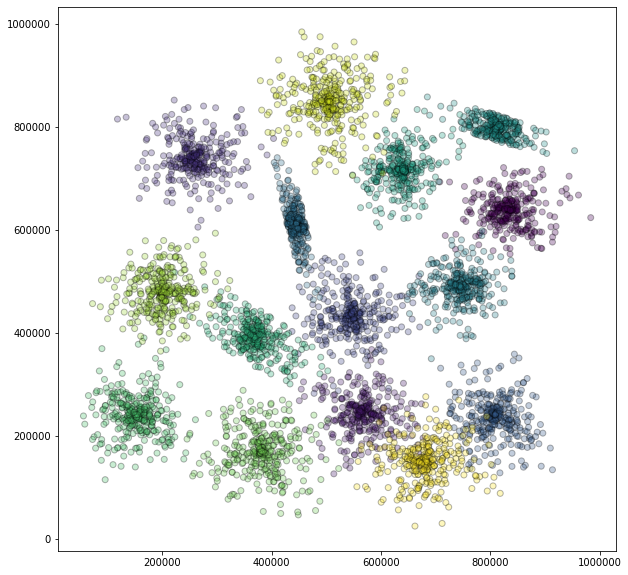

In [9]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
true_num_clusters = np.max(labels)
print("True number of clusters is {}".format(true_num_clusters))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [10]:
### BEGIN Solution
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

# >>> your solution here <<<

class AgglomerativeClusteringWrapper(AgglomerativeClustering):
    def predict(self, X=None, y=None):
        return self.fit_predict(X, y)


def silhouette_scorer(est, X, y, sample_weight=None):
    y_pred = est.predict(X)
    return silhouette_score(X, y_pred, random_state=RANDOM_STATE)

mutual_info_scorer = make_scorer(mutual_info_score)


print(f'silhouette_score for true labels: {silhouette_score(points, labels):.4f}')
points_std = StandardScaler().fit_transform(points)

### END Solution

silhouette_score for true labels: 0.6089


In [11]:
kmeans_params = {'init': ['k-means++', 'random'],
                 'n_init': [2, 5, 10, 13]
                }

gmm_params = {'reg_covar': [1e-6, 1e-5, 1e-4],
              'covariance_type': ['full', 'tied', 'diag', 'spherical']
             }

birch_params = {'threshold': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7],
                'branching_factor' : [30, 40, 50, 60]
               }

agglomer_params = {'affinity': ['euclidean', 'manhattan', 'cosine'],
                   'linkage': ['ward', 'complete', 'average', 'single']
                  }


algorithms = [KMeans(n_clusters=true_num_clusters, random_state=RANDOM_STATE),
              GaussianMixture(n_components=true_num_clusters, random_state=RANDOM_STATE),
              Birch(n_clusters=15),
              AgglomerativeClusteringWrapper(n_clusters=true_num_clusters)
             ]

names = ['KMeans', 'GaussianMixture', 'Birch',  'AgglomerativeClustering']
params = [kmeans_params, gmm_params, birch_params, agglomer_params]

In [12]:
%%time
silhouette_best_params = []
mutual_info_best_params = []

for name, alg, param in zip(names, algorithms, params):
    print(f'\n{name}:')

    silhouette_gs = GridSearchCV(alg, param, scoring=silhouette_scorer, n_jobs=-1, cv=3)
    mutual_info_gs = GridSearchCV(alg, param, scoring=mutual_info_scorer, n_jobs=-1, cv=3)

    silhouette_gs.fit(points_std, labels)
    mutual_info_gs.fit(points_std, labels)

    if name == 'AgglomerativeClustering':
        silhouette_y_pred = silhouette_gs.best_estimator_.labels_
        mutual_info_y_pred = mutual_info_gs.best_estimator_.labels_
    else:   
        silhouette_y_pred = silhouette_gs.best_estimator_.predict(points_std)
        mutual_info_y_pred = mutual_info_gs.best_estimator_.predict(points_std)

    print(f'\tsilhouette_score: {silhouette_score(points_std, silhouette_y_pred):.4f}')
    print(f'\tsilhouette params: {silhouette_gs.best_params_}\n')

    print(f'\tmutual_info_score: {mutual_info_score(labels, mutual_info_y_pred):.4f}')
    print(f'\tmutual info params: {mutual_info_gs.best_params_}\n')

    silhouette_best_params.append(silhouette_gs.best_params_)
    mutual_info_best_params.append(mutual_info_gs.best_params_)


KMeans:
	silhouette_score: 0.5907
	silhouette params: {'init': 'random', 'n_init': 2}

	mutual_info_score: 2.5621
	mutual info params: {'init': 'random', 'n_init': 10}


GaussianMixture:
	silhouette_score: 0.6261
	silhouette params: {'covariance_type': 'tied', 'reg_covar': 1e-06}

	mutual_info_score: 2.5661
	mutual info params: {'covariance_type': 'full', 'reg_covar': 0.0001}


Birch:
	silhouette_score: 0.6067
	silhouette params: {'branching_factor': 30, 'threshold': 0.3}

	mutual_info_score: 2.3617
	mutual info params: {'branching_factor': 30, 'threshold': 0.1}


AgglomerativeClustering:


/Users/aleksandr.belov/work/tools/anaconda3/envs/u_env/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/aleksandr.belov/work/tools/anaconda3/envs/u_env/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


	silhouette_score: 0.6073
	silhouette params: {'affinity': 'euclidean', 'linkage': 'average'}

	mutual_info_score: 2.5180
	mutual info params: {'affinity': 'euclidean', 'linkage': 'average'}

CPU times: user 5.44 s, sys: 764 ms, total: 6.2 s
Wall time: 4min 50s


KMeans
	Silhouette best params


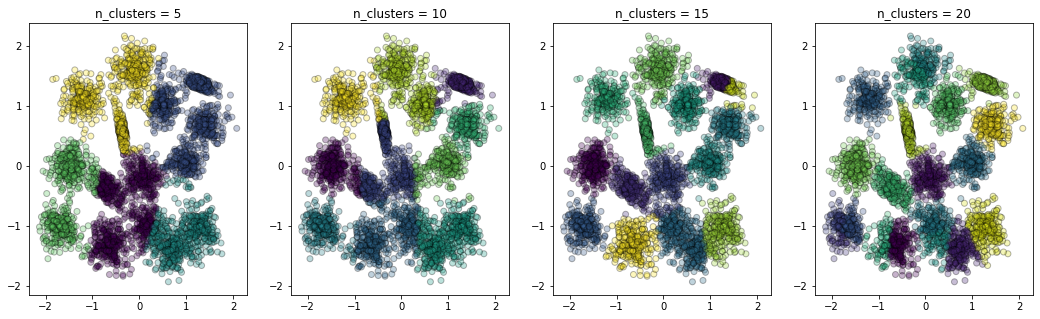

	Mutual info best params


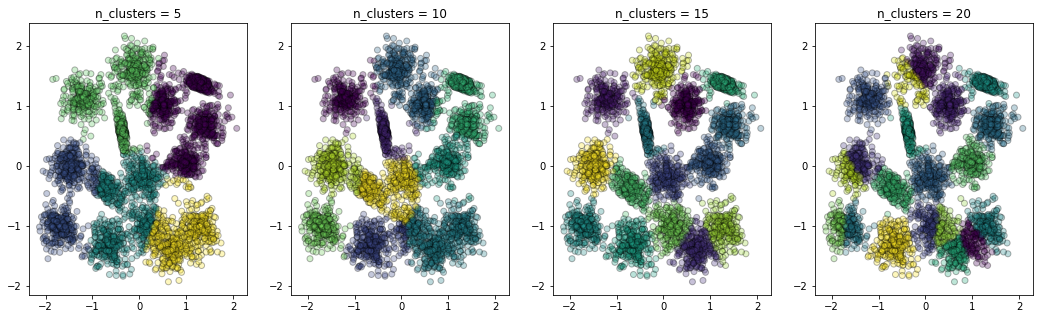

GaussianMixture
	Silhouette best params


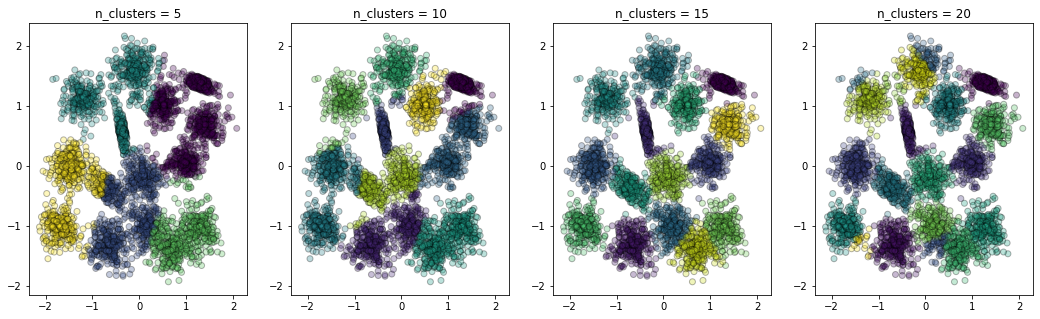

	Mutual info best params


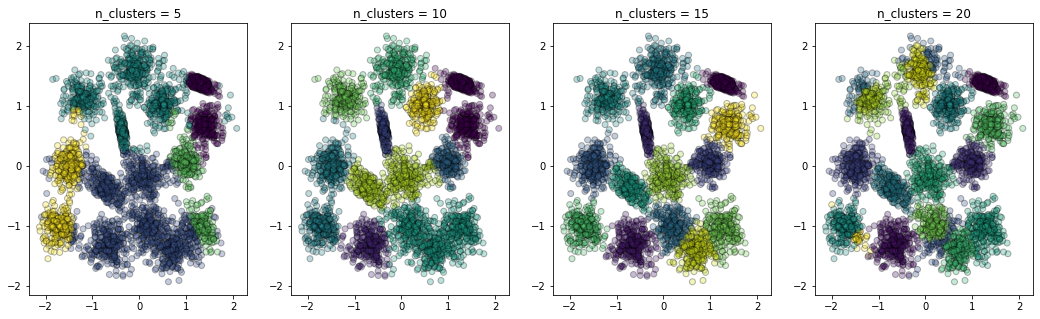

Birch
	Silhouette best params


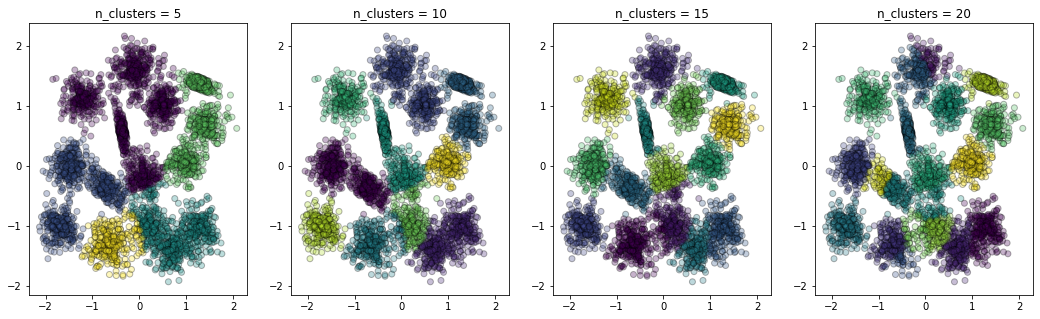

	Mutual info best params


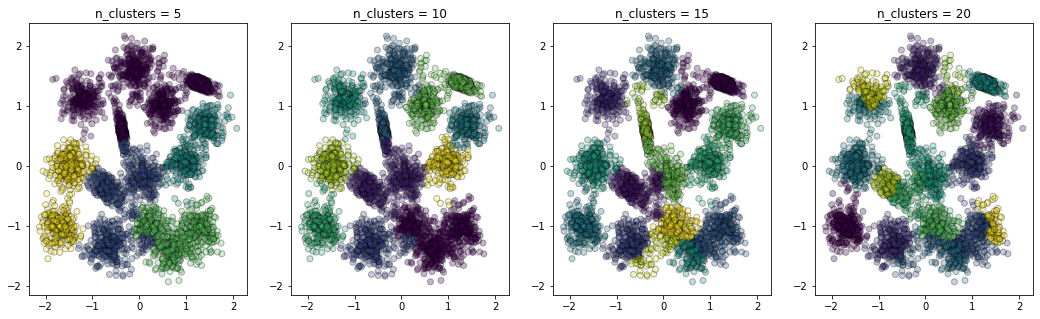

AgglomerativeClustering
	Silhouette best params


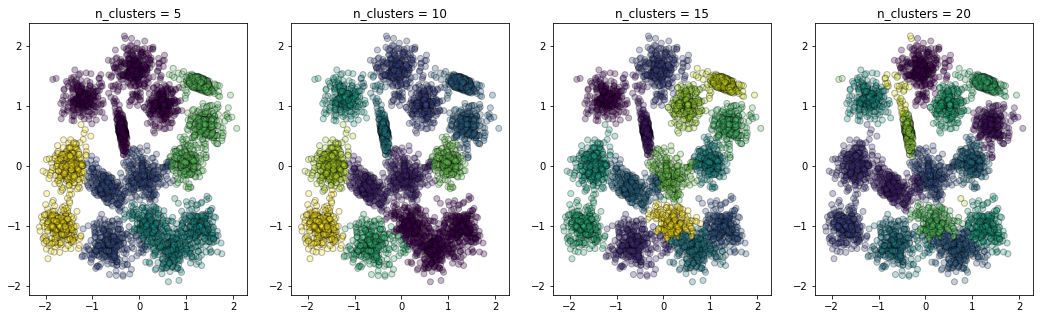

	Mutual info best params


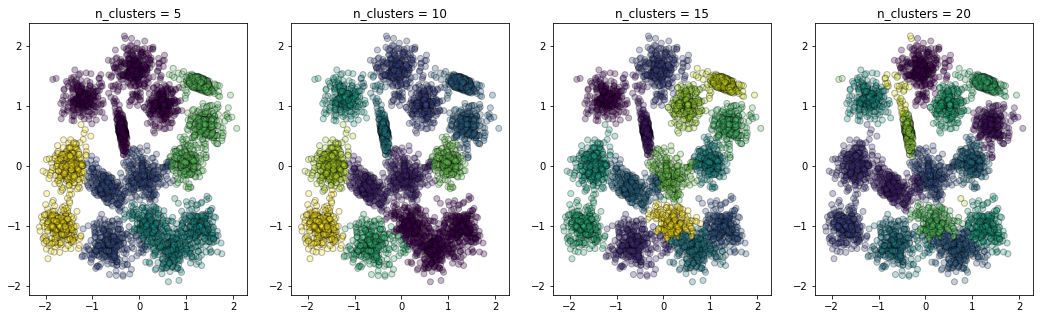

In [13]:
# Apply the algorithm with the true number of clusters and at least two other
# settings for the number of clusters: a smaller and a larger number than the true one;

### BEGIN Solution

# >>> your solution here <<<
n_clusters = [5, 10, 15, 20]
type_params = zip(silhouette_best_params, mutual_info_best_params)
type_param_names = ['Silhouette best params', 'Mutual info best params']

for name, alg, type_param in zip(names, algorithms, type_params):
    print(name)
    for param, param_name in zip(type_param, type_param_names):
        print(f'\t{param_name}')
        fig, axis = plt.subplots(1, len(n_clusters), figsize=(18, 5))

        alg.set_params(**param)
        for i, n in enumerate(n_clusters):
            if name == 'GaussianMixture':
                alg.set_params(n_components=n)
            else:
                alg.set_params(n_clusters=n)

            alg.fit(points_std, labels)
            y_pred = alg.predict(points_std)
            axis[i].scatter(points_std[:, 0], points_std[:, 1], c=y_pred, alpha=0.3, edgecolor='k')
            axis[i].set_title(f'n_clusters = {n}')

        plt.show()
### END Solution

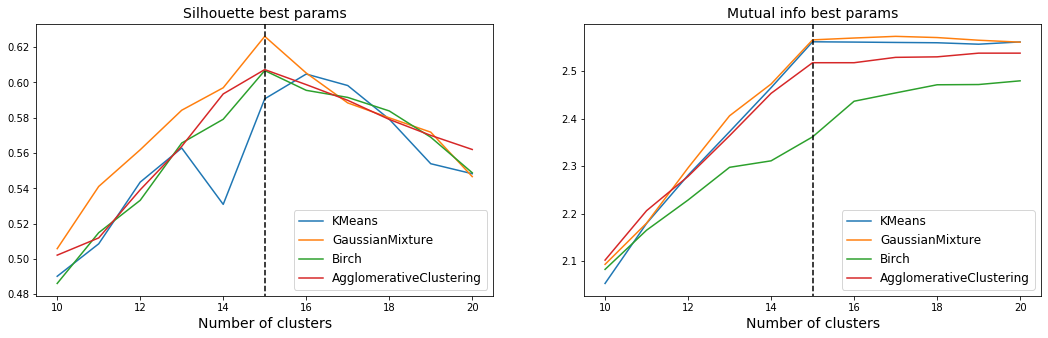

CPU times: user 1min 6s, sys: 5.97 s, total: 1min 12s
Wall time: 50.5 s


In [14]:
%%time
# vizualize the clustering result, calculate the clustering metrics and plot them;
### BEGIN Solution

# >>> your solution here <<<
type_params = [silhouette_best_params, mutual_info_best_params]
type_score = [silhouette_scorer, mutual_info_scorer]
num_clusters = list(range(10, 21))

fig, axis = plt.subplots(1, 2, figsize=(18, 5))
for i, (params, param_names, scorer) in enumerate(zip(type_params, type_param_names, type_score)):
    for param, alg, name in zip(params, algorithms, names):
        alg.set_params(**param)

        scores = []
        for n in num_clusters:
            if name == 'GaussianMixture':
                alg.set_params(n_components=n)
            else:
                alg.set_params(n_clusters=n)

            alg.fit(points_std, labels)
            scores.append(scorer(alg, points_std, labels))

        axis[i].plot(num_clusters, scores, label=name)
        
    axes = axis[i].axis()
    axis[i].plot([15, 15], [-5, 5], 'k--')
    axis[i].set_xlim( [axes[0], axes[1]])
    axis[i].set_ylim( [axes[2], axes[3]])
    
    axis[i].set_title(param_names, fontsize=14)
    axis[i].legend(loc='best', fontsize=12)
    axis[i].set_xlabel('Number of clusters', fontsize=14)

plt.show()

### END Solution

### Task 2.2. Finding the Number of Clusters with Bootstrap. (2 points)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence interval (CI)**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__  
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

In [15]:
%%time
import scipy.stats as stats
from tqdm.notebook import tqdm

### BEGIN Solution

cluster_ns = num_clusters # >>> your solution here <<<
sample_number = 50 # >>> your solution here <<<
sample_size = int((1-np.exp(-1))*len(points_std))
mean_scores = []
ci_scores = []


for i, n_clusters in tqdm(enumerate(cluster_ns)):
    # >>> your solution here <<<
    print(f'\nNumber of clusters: {n_clusters}')
    scores = []

    for j in range(sample_number):
        idx = np.random.choice(range(len(points_std)), replace=True, size=sample_size)
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(points_std[idx], labels[idx])

        y_pred = kmeans.predict(points_std[idx])

        score = silhouette_score(points_std[idx], y_pred)
        scores.append(score)

    mean = np.mean(scores)
    ci = stats.norm.interval(0.95, loc=mean, scale=np.std(scores))
    print(f'\tVariance: {np.var(scores)}')
    print(f'\tConfidence interval: {ci}')
    mean_scores.append(mean)
    ci_scores.append(ci)
### END Solution


Number of clusters: 10
	Variance: 6.854336439102023e-05
	Confidence interval: (0.4995343706466495, 0.5319878149470585)

Number of clusters: 11
	Variance: 6.295110738773906e-05
	Confidence interval: (0.5235141235960828, 0.5546155117803485)

Number of clusters: 12
	Variance: 5.825230080486321e-05
	Confidence interval: (0.5485671962455113, 0.5784853388852255)

Number of clusters: 13
	Variance: 4.3127245260105975e-05
	Confidence interval: (0.5737546453916404, 0.5994973365265373)

Number of clusters: 14
	Variance: 3.7726214880170905e-05
	Confidence interval: (0.6011453237226192, 0.6252221757529686)

Number of clusters: 15
	Variance: 3.534985746460638e-05
	Confidence interval: (0.6158659039481624, 0.6391721281612512)

Number of clusters: 16
	Variance: 3.7329574145356544e-05
	Confidence interval: (0.6004615481978567, 0.6244114978323286)

Number of clusters: 17
	Variance: 6.362455968881458e-05
	Confidence interval: (0.5789934142865621, 0.610260721559775)

Number of clusters: 18
	Variance: 7.5

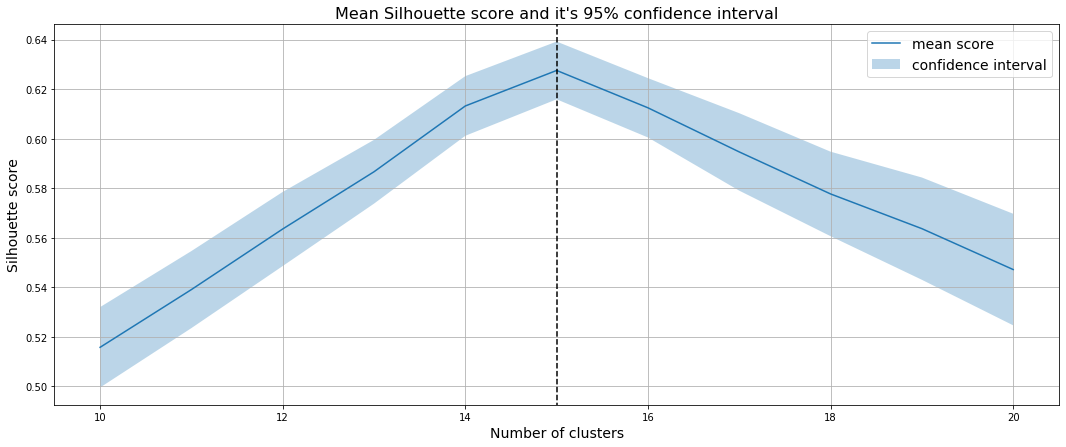

In [16]:
plt.figure(figsize=(18, 7))

ci_scores = np.array(ci_scores)
plt.plot(cluster_ns, mean_scores, label='mean score')
plt.fill_between(cluster_ns, ci_scores[:, 0], ci_scores[:, 1], label='confidence interval', alpha=0.3)

axes = plt.axis()
plt.plot([15, 15], [-5, 5], 'k--')
plt.xlim([axes[0], axes[1]])
plt.ylim([axes[2], axes[3]])

plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Mean Silhouette score and it\'s 95% confidence interval', fontsize=16)
plt.legend(loc='best', fontsize=14)

plt.grid()
plt.show()

## Task 3. MNIST, kMNIST component analysis and manifold learning. (6 points)
### Task 3.1. (2 points)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimentionality, decompose the dataset on pinciple components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case use can use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. **(1 pt.)** Estimate the intrinsic dimentionality of the dataset. Provide the plot.
2. **(1 pt.)** Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [17]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

sns.set()

dg = datasets.load_digits()

data = MinMaxScaler().fit_transform(dg.data)
data.shape

(1797, 64)

In [18]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors


def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstanec betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample


def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k


def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in tqdm(iters):
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

In [19]:
%%time
'''
The code was took from example: https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4
'''

k1 = 4
k2 = data.shape[1]
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=50,
                             k1=k1, 
                             k2=k2
                            )

intdim_k_repeated = np.array(intdim_k_repeated)


CPU times: user 11min 24s, sys: 6.81 s, total: 11min 31s
Wall time: 7min 48s


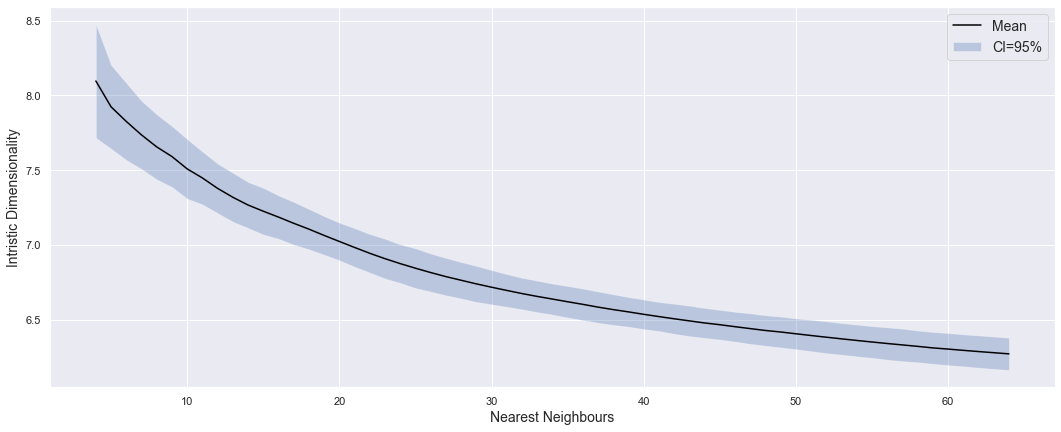

In [20]:
mean = np.mean(intdim_k_repeated, axis=0)
std = np.std(intdim_k_repeated, axis=0)

dims = list(range(k1, k2+1))
ci = np.array(stats.norm.interval([0.95]*len(dims), loc=mean, scale=std))

plt.figure(figsize=(18, 7))

plt.plot(dims, mean, color='black', label='Mean')
plt.fill_between(dims, ci[0], ci[1], label='CI=95%', alpha=0.3)

plt.xlabel('Nearest Neighbours', fontsize=14)
plt.ylabel('Intristic Dimensionality', fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

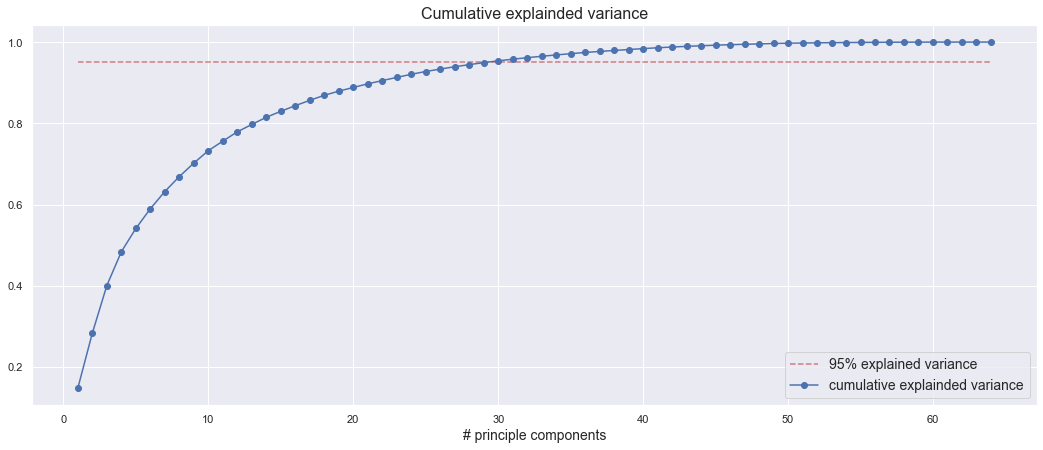

In [21]:
# Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component.
from sklearn.decomposition import PCA

### BEGIN Solution

# >>> your solution here <<<

pca = PCA(n_components=64)
pca.fit(data)
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(18, 7))

plt.plot([1, 64], [0.95, 0.95], 'r--', alpha=0.7, label='95% explained variance')
plt.plot(range(1, 65), cum_explained_variance_ratio, 'b-o', label='cumulative explainded variance')

plt.title('Cumulative explainded variance', fontsize=16)
plt.xlabel('# principle components', fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

### END Solution

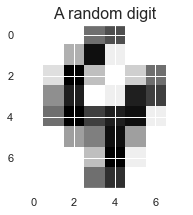

In [22]:
# Plot the example of back-decomposition with 6 different 
# set of components and corresponding explained variance. You can choose any digit from the dataset.

np.random.seed(RANDOM_STATE)
idx = np.random.randint(1, len(data)+1)

plt.figure(5, figsize=(3, 3))
plt.imshow(dg.images[idx], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('A random digit', fontsize=16)
plt.show()

y = dg.target
X = dg.images.reshape(-1, 1, 8*8) / dg.images.max()
digit = X[idx]


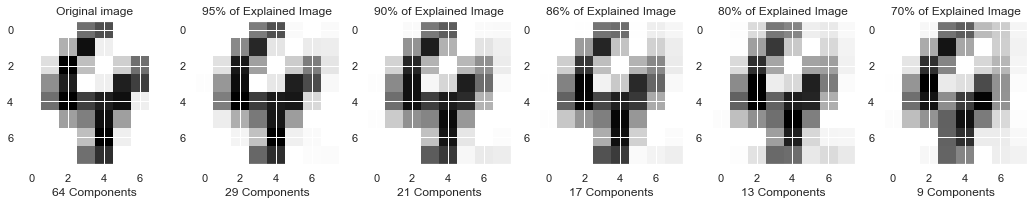

In [23]:
### BEGIN Solution

# >>> your solution here <<<
n_components = [29, 21, 17, 13, 9]

fig, axis = plt.subplots(1, len(n_components)+1, figsize=(18, 6))


axis[0].imshow(digit.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
axis[0].set_title('Original image', fontsize=12)
axis[0].set_xlabel(f'64 Components')

for i, n in enumerate(n_components, 1):
    
    pca = PCA(n_components=n)
    pca.fit(data)

    explained_image = pca.explained_variance_ratio_.sum()
    
    digit_proj = pca.transform(digit)
    restored_digit = pca.inverse_transform(digit_proj)

    axis[i].imshow(restored_digit.reshape(8, 8), cmap=plt.cm.gray_r, 
                   interpolation='nearest', vmin=0, vmax=1)
    axis[i].set_title(f'{explained_image*100:.0f}% of Explained Image', fontsize=12)
    axis[i].set_xlabel(f'{n} Components')

### END Solution

### Task 3.2. (2 points)

Here we will visualise the decomposition in order to observe how data diverges across different manofild learning methods. We are  to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Make sure the data is whitened (scaled), enjoy nice plots :) 
2. **(1 pt.)** Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimention**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
3. **(1 pt.)** Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 senteces.

__NOTE:__ In first task, `plotly` will not display the plot in offline notebook, so it is just for you to visualize the projection in 3D.

In [24]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

In [25]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
### BEGIN Solution

# >>> your solution here <<<

pca = PCA(n_components=3)
S_pca_ = pca.fit_transform(data) # >>> your solution here <<<

ica = FastICA(n_components=3, random_state=RANDOM_STATE)
S_ica_ = ica.fit_transform(data)

isomap = Isomap(n_components=3, n_jobs=-1)
S_isomap_ = isomap.fit_transform(data)

names = ['PCA', 'ICA', 'Isomap']
titles = [f'MNIST visualization {name}' for name in names]
### END Solution

In [ ]:
def plot_3d(points, labels, title):
    digits_3d = pd.DataFrame({
        'x': points[:, 0], 
        'y': points[:, 1], 
        'z': points[:, 2],
        'label': labels,
    })

    colors = cl.scales['10']['qual']['Paired']
    data = []

    for i in range(10):
        x = digits_3d[digits_3d['label'].astype('int') == i]['x']
        y = digits_3d[digits_3d['label'].astype('int') == i]['y']
        z = digits_3d[digits_3d['label'].astype('int') == i]['z']

        color = colors[i]

        trace = {
            'name': str(i),
            'x': x,
            'y': y,
            'z': z,
            'type': 'scatter3d',
            'mode': 'markers',
            'marker': {
                'size': 5,
                'color': color 
            }
        }
        data.append(trace)

    layout = go.Layout(
        title=title,
        width=900,
        height=600
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)
    
plot_3d(S_pca_, dg['target'], titles[0])
plot_3d(S_ica_, dg['target'], titles[1])
plot_3d(S_isomap_, dg['target'], titles[2])

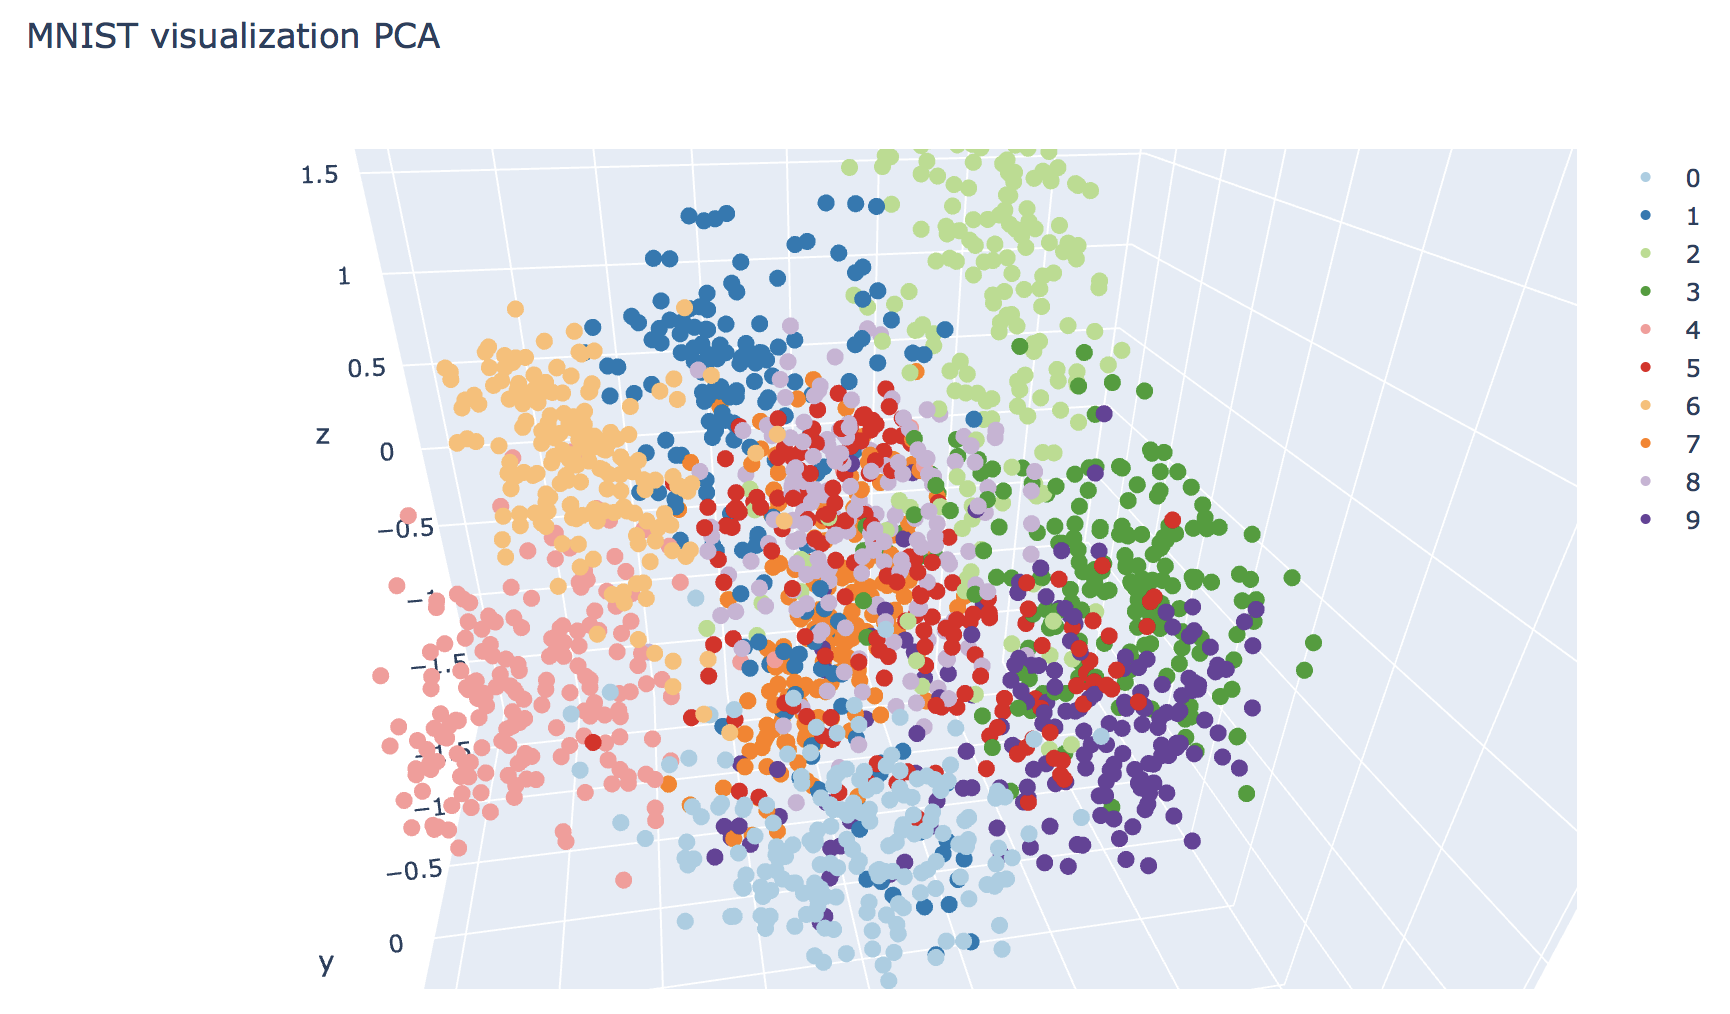

In [28]:
from IPython.display import Image
Image('pca.png')

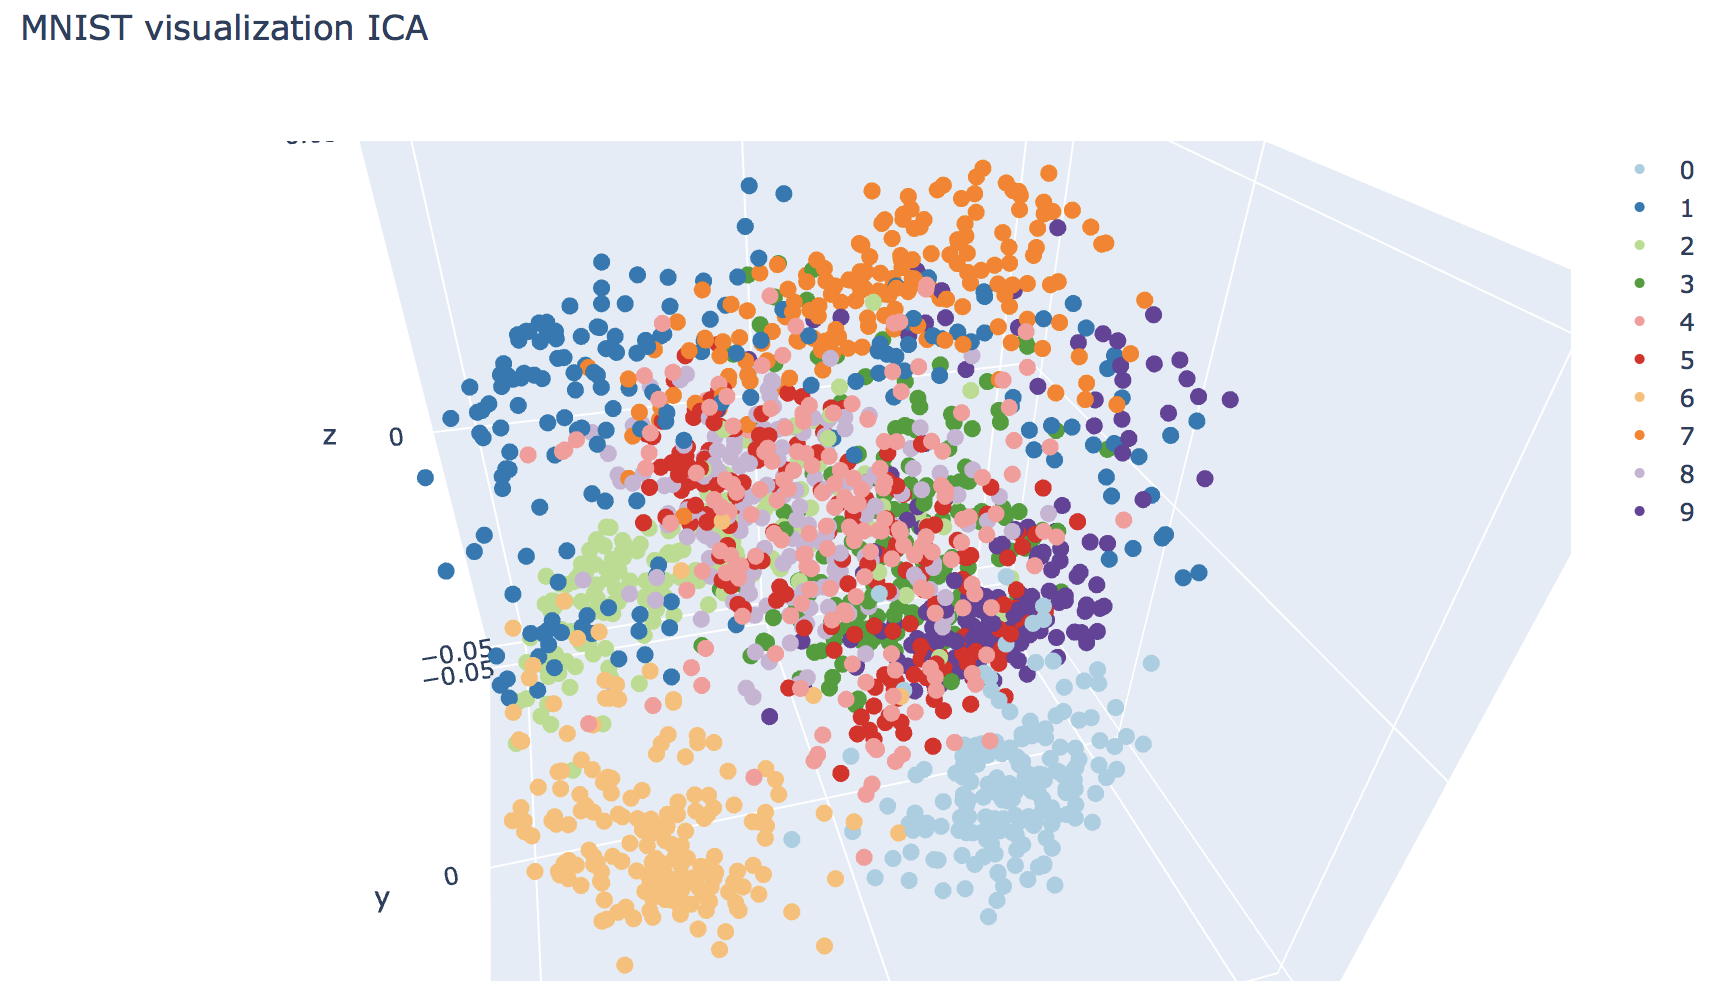

In [29]:
Image('ica.png')

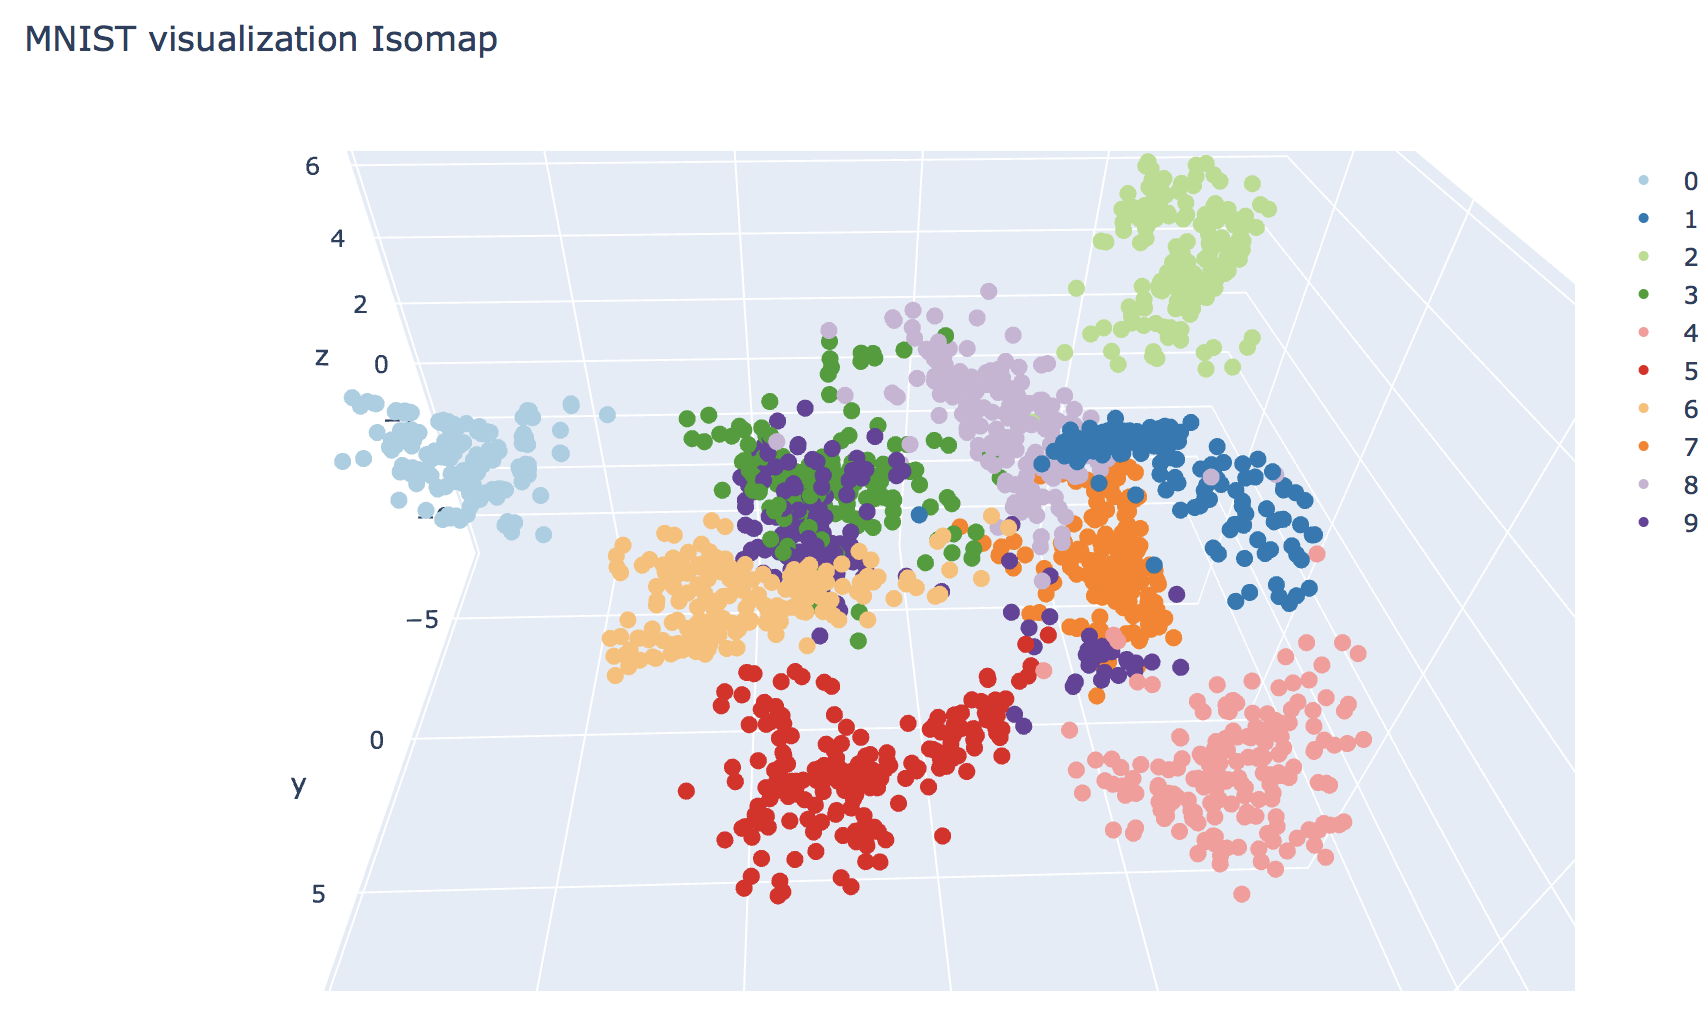

In [30]:
Image('isomap.png')

### Let's check linear separability of the data in 3D

In [31]:
%%time
# Calculate new features on the data with ICA, PCA and Isomap and the classification accuracy on these features 

from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', n_jobs=-1, random_state=RANDOM_STATE)
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=RANDOM_STATE)

### BEGIN Solution

# >>> your solution here <<<

scores = list()
n_components = 3

methods = [PCA(n_components=n_components, random_state=RANDOM_STATE), 
           FastICA(n_components=n_components),
           Isomap(n_components=n_components, n_jobs=-1)
          ]

for train_index, test_index in rkf.split(data, dg['target']):
    method_scores = []
    for method in methods:
        data_reduced = method.fit_transform(data)
        
        logreg.fit(data_reduced[train_index], dg['target'][train_index])
        y_pred = logreg.predict(data_reduced[test_index])
        
        method_scores.append(accuracy_score(dg['target'][test_index], y_pred))
    
    scores.append(method_scores)
    
scores = np.array(scores)

/Users/aleksandr.belov/work/tools/anaconda3/envs/u_env/lib/python3.7/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning:

invalid value encountered in multiply



CPU times: user 30 s, sys: 857 ms, total: 30.9 s
Wall time: 26.4 s


In [32]:
mean_acc = np.mean(scores, axis=0)
std_acc = np.std(scores, axis=0)
pd.DataFrame(data={'mean accuracy': mean_acc, 'std':std_acc}, index=names)

mean accuracy       std
PCA          0.696347  0.015206
ICA          0.621047  0.018965
Isomap       0.927278  0.012855

In [33]:
# >>> your solution here <<<
_, p_value = stats.ttest_ind(scores[:, 0], scores[:, 1])
print(f'Statistically significant improvement of PCA decomposition over ICA: p-value {p_value}')

Statistically significant improvement of PCA decomposition over ICA: p-value 3.3630408899927555e-12


In [34]:
# >>> your solution here <<<
_, p_value = stats.ttest_ind(scores[:, 2], scores[:, 0])
print(f'Statistically significant improvement of Isomap decomposition over PCA: p-value {p_value}')

### END Solution

Statistically significant improvement of Isomap decomposition over PCA: p-value 3.1619881665247083e-27


- We can see that p-values is really small (less than `0.05`)
- It means that we reject the zero-hypothesis - the scores have the same distribution
- And take the alternative-hypothesis - the scores have the different distribution

### Task 3.3. kMNIST dimensionality reduction. (2 points)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engeneer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than `93%`. Is it fair to `fit` with manifold Learning method for both train and test samples? 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`, you will find it in __Part 2__.  Save 3 first components of your projection on `train` sample to `.csv`, we are going to visually compare them later.


In [35]:
%%time
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('data/kmnist/kmnist-train-imgs.npz')
x_test = load('data/kmnist/kmnist-test-imgs.npz')
y_train = load('data/kmnist/kmnist-train-labels.npz')
y_test = load('data/kmnist/kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

### BEGIN Solution

# >>> your solution here <<<
data_dim = x_train.shape[1]
pca = PCA(n_components=data_dim, random_state=RANDOM_STATE)
projection_train = pca.fit_transform(x_train)

CPU times: user 15.5 s, sys: 1.42 s, total: 16.9 s
Wall time: 11.8 s


In [36]:
# The .npy format will be more suitable for that

first_three_comp = projection_train[:, :3]
with open('kmnist_train_3.npy', 'wb') as f:
    np.save(f, first_three_comp)

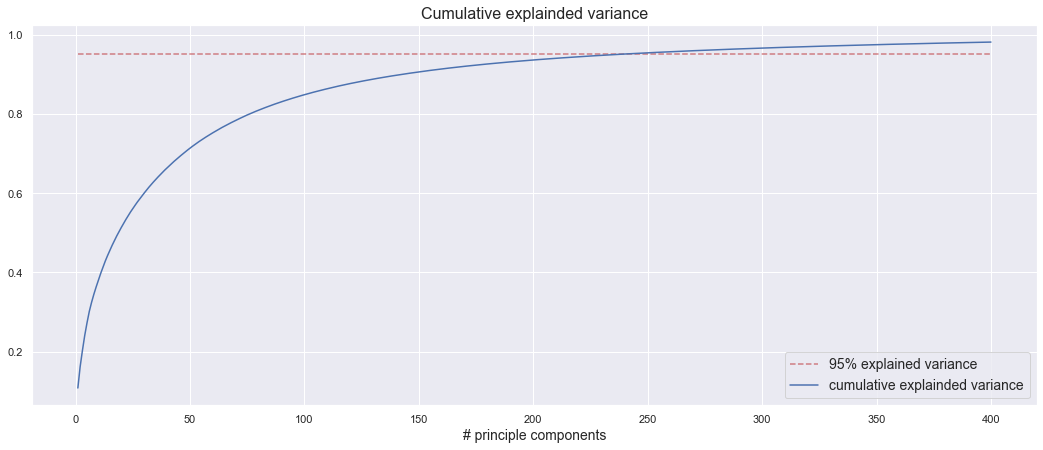

In [37]:
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(18, 7))

plt.plot([1, 400], [0.95, 0.95], 'r--', alpha=0.7, label='95% explained variance')
plt.plot(range(1, 401), cum_explained_variance_ratio[:400], 'b', label='cumulative explainded variance')

plt.title('Cumulative explainded variance', fontsize=16)
plt.xlabel('# principle components', fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

In [38]:
%%time

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
n_components = list(range(10, 310, 10))
scores = []

for n in tqdm(n_components):
    pca = PCA(n_components=n, random_state=RANDOM_STATE)
    train_reduced = pca.fit_transform(x_train)
    test_reduced = pca.transform(x_test)

    knn.fit(train_reduced, y_train)
    y_pred = knn.predict(test_reduced)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)


CPU times: user 1h 59min 8s, sys: 51.7 s, total: 1h 59min 59s
Wall time: 48min 17s


In [44]:
# It will be used in Part 2
pca = PCA(n_components=32, random_state=RANDOM_STATE)
train_reduced = pca.fit_transform(x_train)
test_reduced = pca.transform(x_test)

knn.fit(train_reduced, y_train)
y_pred = knn.predict(test_reduced)
score = accuracy_score(y_test, y_pred)

print('Score for n_components=32: ', score)

Score for n_components=32:  0.9238


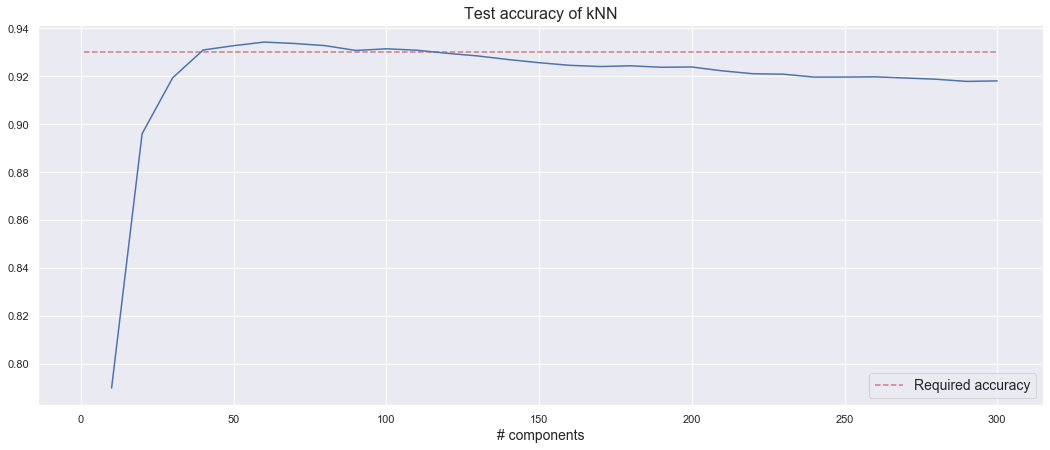

In [43]:
plt.figure(figsize=(18, 7))

plt.plot([1, 300], [0.93, 0.93], 'r--', alpha=0.7, label='Required accuracy')
plt.plot(n_components, scores, 'b')

plt.title('Test accuracy of kNN', fontsize=16)
plt.xlabel('# components', fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

#### Voilla! you are done, have a good day ;)